# 1 About this Notebook
- This Notebook is to set the outline and structure of the `program` that plot Density Frequency Histogram.
- I don't know if there is a better way to plot this graph, but I want to practise writing it myself.

# 2 Definitions
## 2.1 Define the Problem
- Sometimes, we want to use a histogram with different interval widths (or just because we have no other choice), like this Data
<img src='./images/data.png' />
- But if we use the `frequency` for plotting, it look like this,
<img src='./images/mislead-plot.png' />
which can lead us to the wrong insight that the number of people playing from 10 to 24 hours a day is high.

## 2.2 Solution
- To solve this problem, we need to use a property of `Histogram`: **`the frequency is proportional to the area of each bar`**.
- And instead of using the normal `frequency`, we will define a different kind of frequency called `Density Frequency`.
<img src='./images/histo-bar.png' />
- Each Bar is a rectangle whose `Area` is a multiplication of its `Width` and `Height`. We already have group's intervals as `Width` and `Frequency` as `Area`, then we can use them to calculate the `Height` as following: $Height = \frac{Area}{Width}$
- And as that, we have `Height` as what we call `Density Frequency`.

# 3 Preparation

In [2]:
# Import packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Create an Example Dataset
df = pd.DataFrame({'Hours': ['0-1', '1-3', '3-5', '5-10', '10-24'], 
                   'Frequency': [4300, 6900, 4900, 2000, 2100]})
# Take a look
df

,Hours,Frequency
0,0-1,4300
1,1-3,6900
2,3-5,4900
3,5-10,2000
4,10-24,2100


# 4 Problem Solving
## 4.1 Find essential Information: Width and Height
- We will use the `Hour` Attribute to find the `Width`, then using `Width` and `Frequency` to find `Height`.

In [12]:
# Finding Group Width
hours = [df['Hours'][i].split('-') for i in range(df.shape[0])]

# Convert Hours to int
for i in range(len(hours)):
    for j in range(2):
        hours[i][j] = int(hours[i][j])
        
hours

[[0, 1], [1, 3], [3, 5], [5, 10], [10, 24]]

Now we have list `hours` stores pairs of group intervals, in which we can use to find `Width`

In [17]:
df['Width'] = pd.DataFrame([hours[i][1] - hours[i][0] for i in range(len(hours))])
df

,Hours,Frequency,Width
0,0-1,4300,1
1,1-3,6900,2
2,3-5,4900,2
3,5-10,2000,5
4,10-24,2100,14


Now using `Width` and `Frequency` to find `Density Frequency`, but we will call it `Height` here.

In [18]:
df['Height'] = df['Frequency'] / df['Width']
df

,Hours,Frequency,Width,Height
0,0-1,4300,1,4300.0
1,1-3,6900,2,3450.0
2,3-5,4900,2,2450.0
3,5-10,2000,5,400.0
4,10-24,2100,14,150.0


We have everything we need, let's visualize it out.

## 4.2 Visualization
Instead of using `DataFrame.plot`, we don't do it here, we will draw each Bar manually using `matplotlib.patches.Rectangle`.

(0.0, 4515.0)

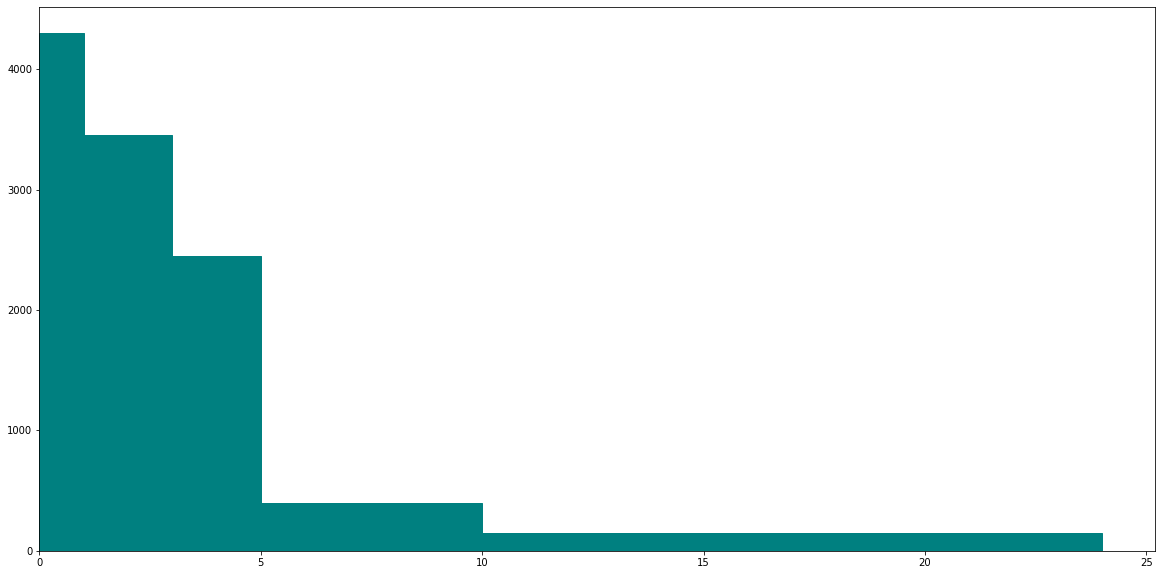

In [38]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

# Don't really know why but without this the Plot dont' show :(
plt.plot()

for i in range(df.shape[0]):
    bar = mpl.patches.Rectangle((hours[i][0], 0), df['Width'][i], df['Height'][i], color='teal')
    ax.add_patch(bar)
    
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

**Observations:**
- The Graph look better now, and instead of misleading us it now shows us the right thing: Not many people play between 10 and 24 hours a day.

But our Program is not generalized, and it's a future story, I will do it later. Now it's done here.